### Barabási-Albert Model

&nbsp;

Barabási-Albert Model is a scale-free model that follows power-law distribution. It is derived from the preferential attachment of Price's Model. The most distinctive feature of the model is the first-mover advantage. The earliest vertices obtain more edges than the later ones simply because more degrees attract more vertices to get attached (hopefully that's not the case in dating, lol). 

Check the original paper to understand why γ=3 in Barabási-Albert Model

https://www.researchgate.net/publication/12779869_Albert_R_Emergence_of_Scaling_in_Random_Networks_Science_286_509-512

&nbsp;

In [1]:
import os
os.chdir('K:/ecole/github')
import matplotlib.pyplot as plt
import numpy as np

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
bamodel=graph.graph()

In [3]:
#initial parameters
min_degree=20

num_of_v=500

In [4]:
#in a barabási albert model
#all vertices should suffice the minimum degree
#that is not the case in networkx
#you may encounter some vertices that violate the minimum degree
#so we create a fully connected graph for first comers
#first comers are guaranteed to have the minimum degree
for i in range(min_degree+1):
    for j in range(min_degree+1):
        if i!=j:
            bamodel.append(i,j,1)

In [5]:
#add new vertices
for i in range(min_degree,num_of_v):
    
    #initialize counter and available vertices
    counter=0
    available=bamodel.vertex()
        
    #each newcomer has to suffice the minimum degree
    while counter<min_degree: 
        
        #get degree of each vertex
        degree_dst=[bamodel.degree(node) for node in available]   
        
        #compute the probability of attaching to one of the vertices
        prob=np.divide(degree_dst,sum(degree_dst))

        #select vertex based upon degree
        #networkx uses a smart way to avoid probability
        #the logic is similar to radix sort
        #basically you create a list 
        #where each vertex occurs at the frequency of its degree
        selected=np.random.choice(available,p=prob)
        
        #remove selected
        available.remove(selected)
        
        #create an edge
        bamodel.append(i,selected,1)
        bamodel.append(selected,i,1)
        
        counter+=1

&nbsp;

### Degree Distribution

&nbsp;

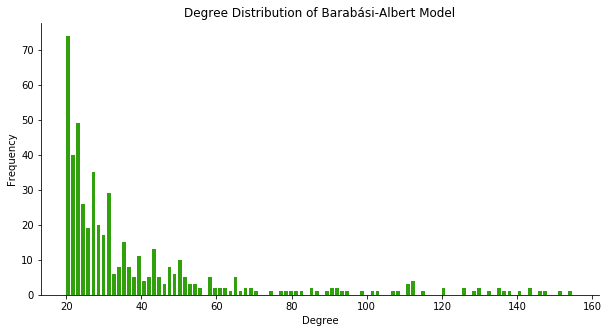

In [6]:
#get degree
degree_dst=[bamodel.degree(node) for node in bamodel.vertex()]

#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#you can use logarithm binning to look nicer
plt.hist(degree_dst,bins=100,width=1,color='#30a10d')
plt.title('Degree Distribution of Barabási-Albert Model')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

&nbsp;

### Power-law Distribution

&nbsp;

In [7]:
import statsmodels.api as sm

In [8]:
#the following expression is based upon network by mark newman
#using derivation from beta and gamma functions
#when k converges to infinity
#the computation can be simplified into 2*(min_degree**2)/(k**3)
#which is consistent with the paper
fraction=[2*min_degree*(min_degree+1)/k/(k+1)/(k+2) for k in degree_dst]

In [9]:
#compute the intercept
m=sm.OLS(np.log(fraction),sm.add_constant(np.log(degree_dst))).fit()

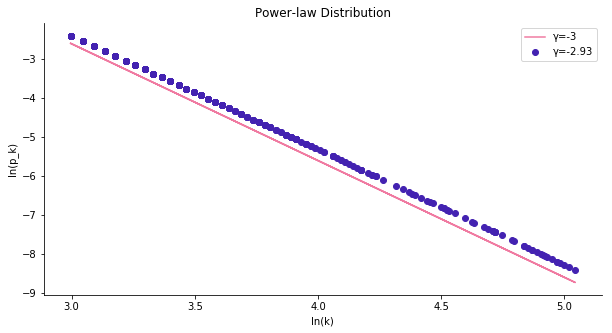

In [10]:
#oulala
#i never expect we have a perfect power-law distribution
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.scatter(np.log(degree_dst),np.log(fraction),
            label=f'γ={round(m.params[1],2)}',color='#4322b1')
plt.plot(np.log(degree_dst),-3*np.log(degree_dst)+m.params[0],
         label='γ=-3',color='#f07aa1')

plt.title('Power-law Distribution')
plt.xlabel('ln(k)')
plt.ylabel('ln(p_k)')
plt.legend()
plt.show()

&nbsp;

### NetworkX

&nbsp;

In [11]:
import networkx as nx

G=nx.random_graphs.barabasi_albert_graph(num_of_v,min_degree)